# Credit Risk Modeling Project

In [292]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x)) # Formats Pandas float output to two decimal places.
np.set_printoptions(suppress=True) # Suppresses scientific notation in numpy arrays.

### Load Data

In [293]:
df_customers = pd.read_csv("dataset/customers.csv")
df_loans = pd.read_csv("dataset/loans.csv")
df_bureau = pd.read_csv("dataset/bureau_data.csv")

In [294]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [295]:
df_customers.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001


In [296]:
df_loans.head(3)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [297]:
df_bureau.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58


In [298]:
df = pd.merge(df_customers, df_loans, on='cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [299]:
df = pd.merge(df, df_bureau, on='cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [301]:
df['default'] = df['default'].astype(int)
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

default is a target variable and we can see some class imbalance here. We will address it later on.

### Train Test split

We perform train test split before doing EDA to prevent data leakage. We don't want test set (which is part of the entire dataset) to influence EDA or any decisions on feature engineering. 

## Data Cleaning

### Handle Missing & Duplicate Values

In [302]:
df.shape

(50000, 33)

In [303]:
df.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 62
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
default                         0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_mon

In [304]:
df.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [305]:
mode_residence = df.residence_type.mode()[0]
mode_residence

'Owned'

In [306]:
df.residence_type.fillna(mode_residence, inplace=True)
df.residence_type.unique()

C:\Users\user\AppData\Local\Temp\ipykernel_20520\4097481224.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.residence_type.fillna(mode_residence, inplace=True)


array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [307]:
df.duplicated().sum()

np.int64(0)

In [308]:
df.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,...,principal_outstanding,bank_balance_at_application,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,...,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,39.55,2640897.50,1.94,16.02,419090.86,4704827.52,3999678.80,80494.71,719942.18,3199743.04,...,1337636.04,989126.38,0.09,2.50,1.00,76.13,4.88,26.86,5.01,43.36
std,9.85,2629441.06,1.54,8.93,168982.67,6267276.39,5376552.03,117312.26,967779.37,4301241.63,...,1214713.89,1046071.89,0.28,1.12,0.81,43.76,5.85,32.83,2.03,29.36
min,18.00,0.00,0.00,1.00,110001.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00
25%,33.00,803000.00,0.00,8.00,302001.00,1147000.00,967000.00,19340.00,174060.00,773600.00,...,424799.00,287007.50,0.00,1.00,0.00,42.00,0.00,0.00,4.00,18.00
50%,40.00,1892000.00,2.00,16.00,400001.00,2656000.00,2240000.00,44800.00,403200.00,1792000.00,...,1002309.00,668525.00,0.00,3.00,1.00,71.00,3.00,14.00,5.00,39.00
75%,46.00,3332250.00,3.00,24.00,560001.00,5172250.00,4611000.00,92240.00,829980.00,3688800.00,...,1790751.00,1238667.00,0.00,4.00,2.00,107.00,9.00,46.00,6.00,67.00
max,70.00,11999000.00,5.00,31.00,700001.00,52175000.00,47819000.00,5698029.90,8607420.00,38255200.00,...,5000000.00,7846643.00,1.00,4.00,2.00,223.00,24.00,171.00,9.00,99.00


In [309]:
df.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'default',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio'],
      dtype='object')

In [310]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address', 
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

### Box plot to visualize outliers

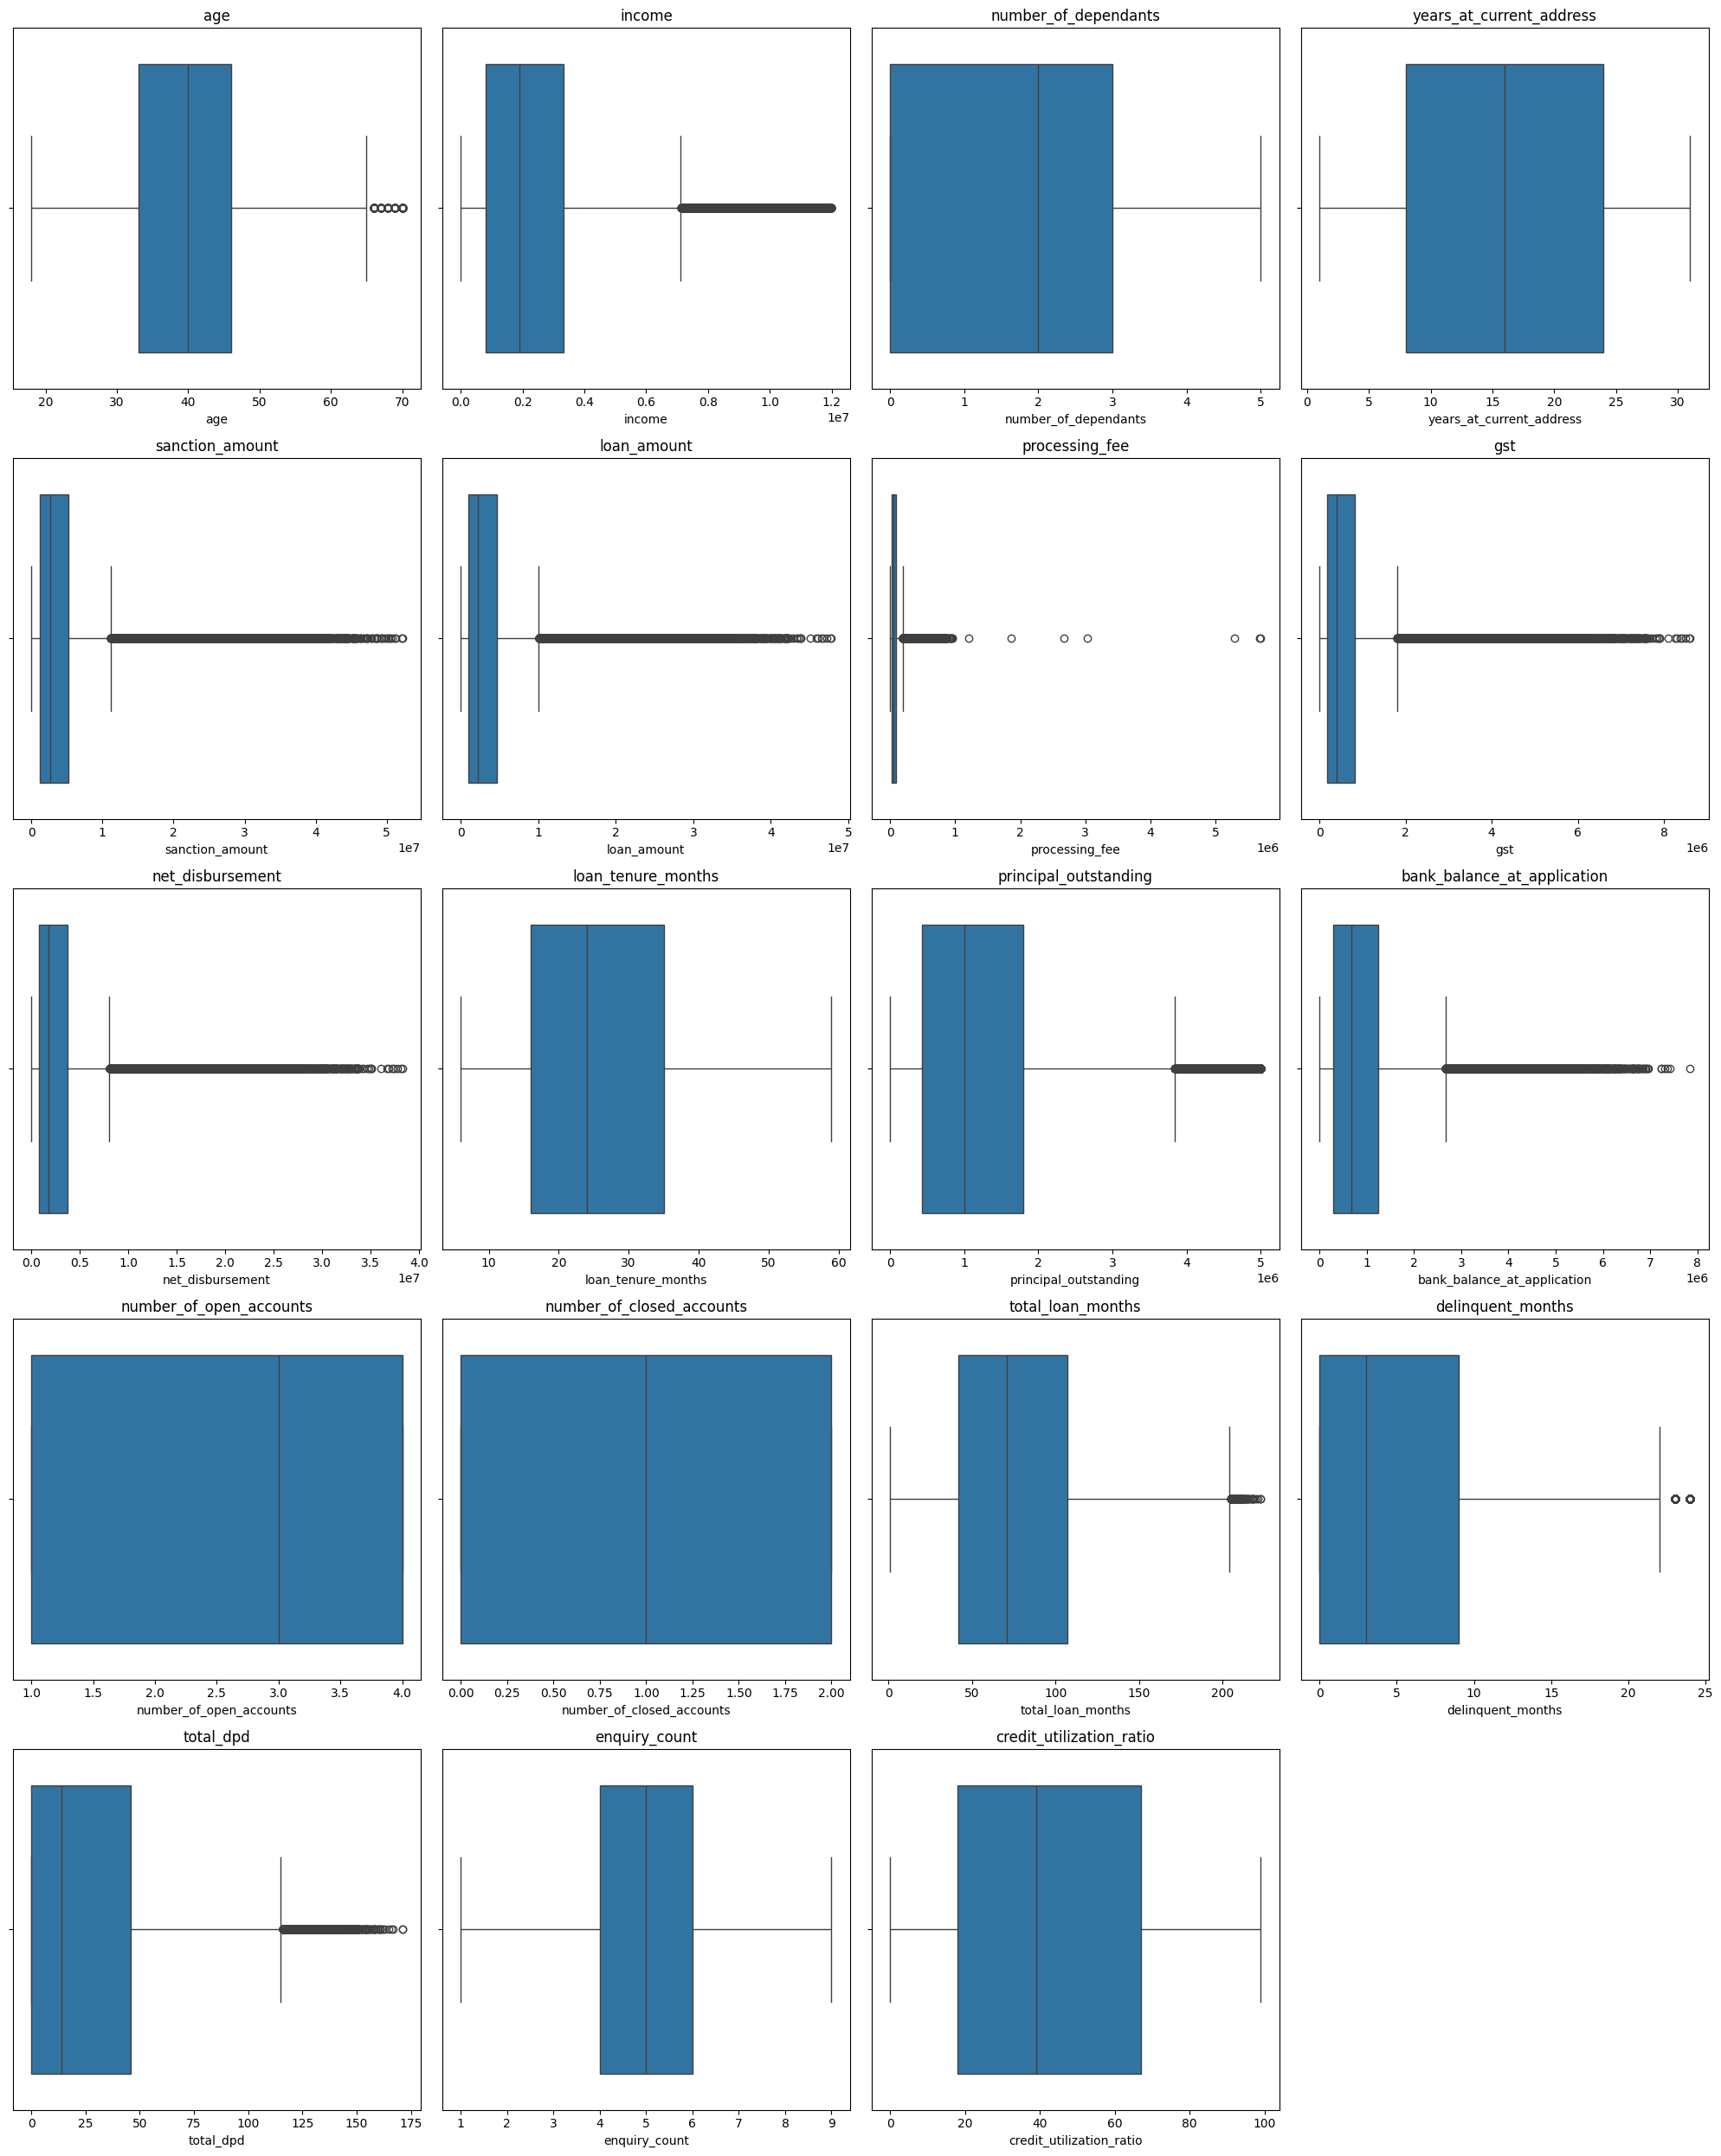

In [311]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

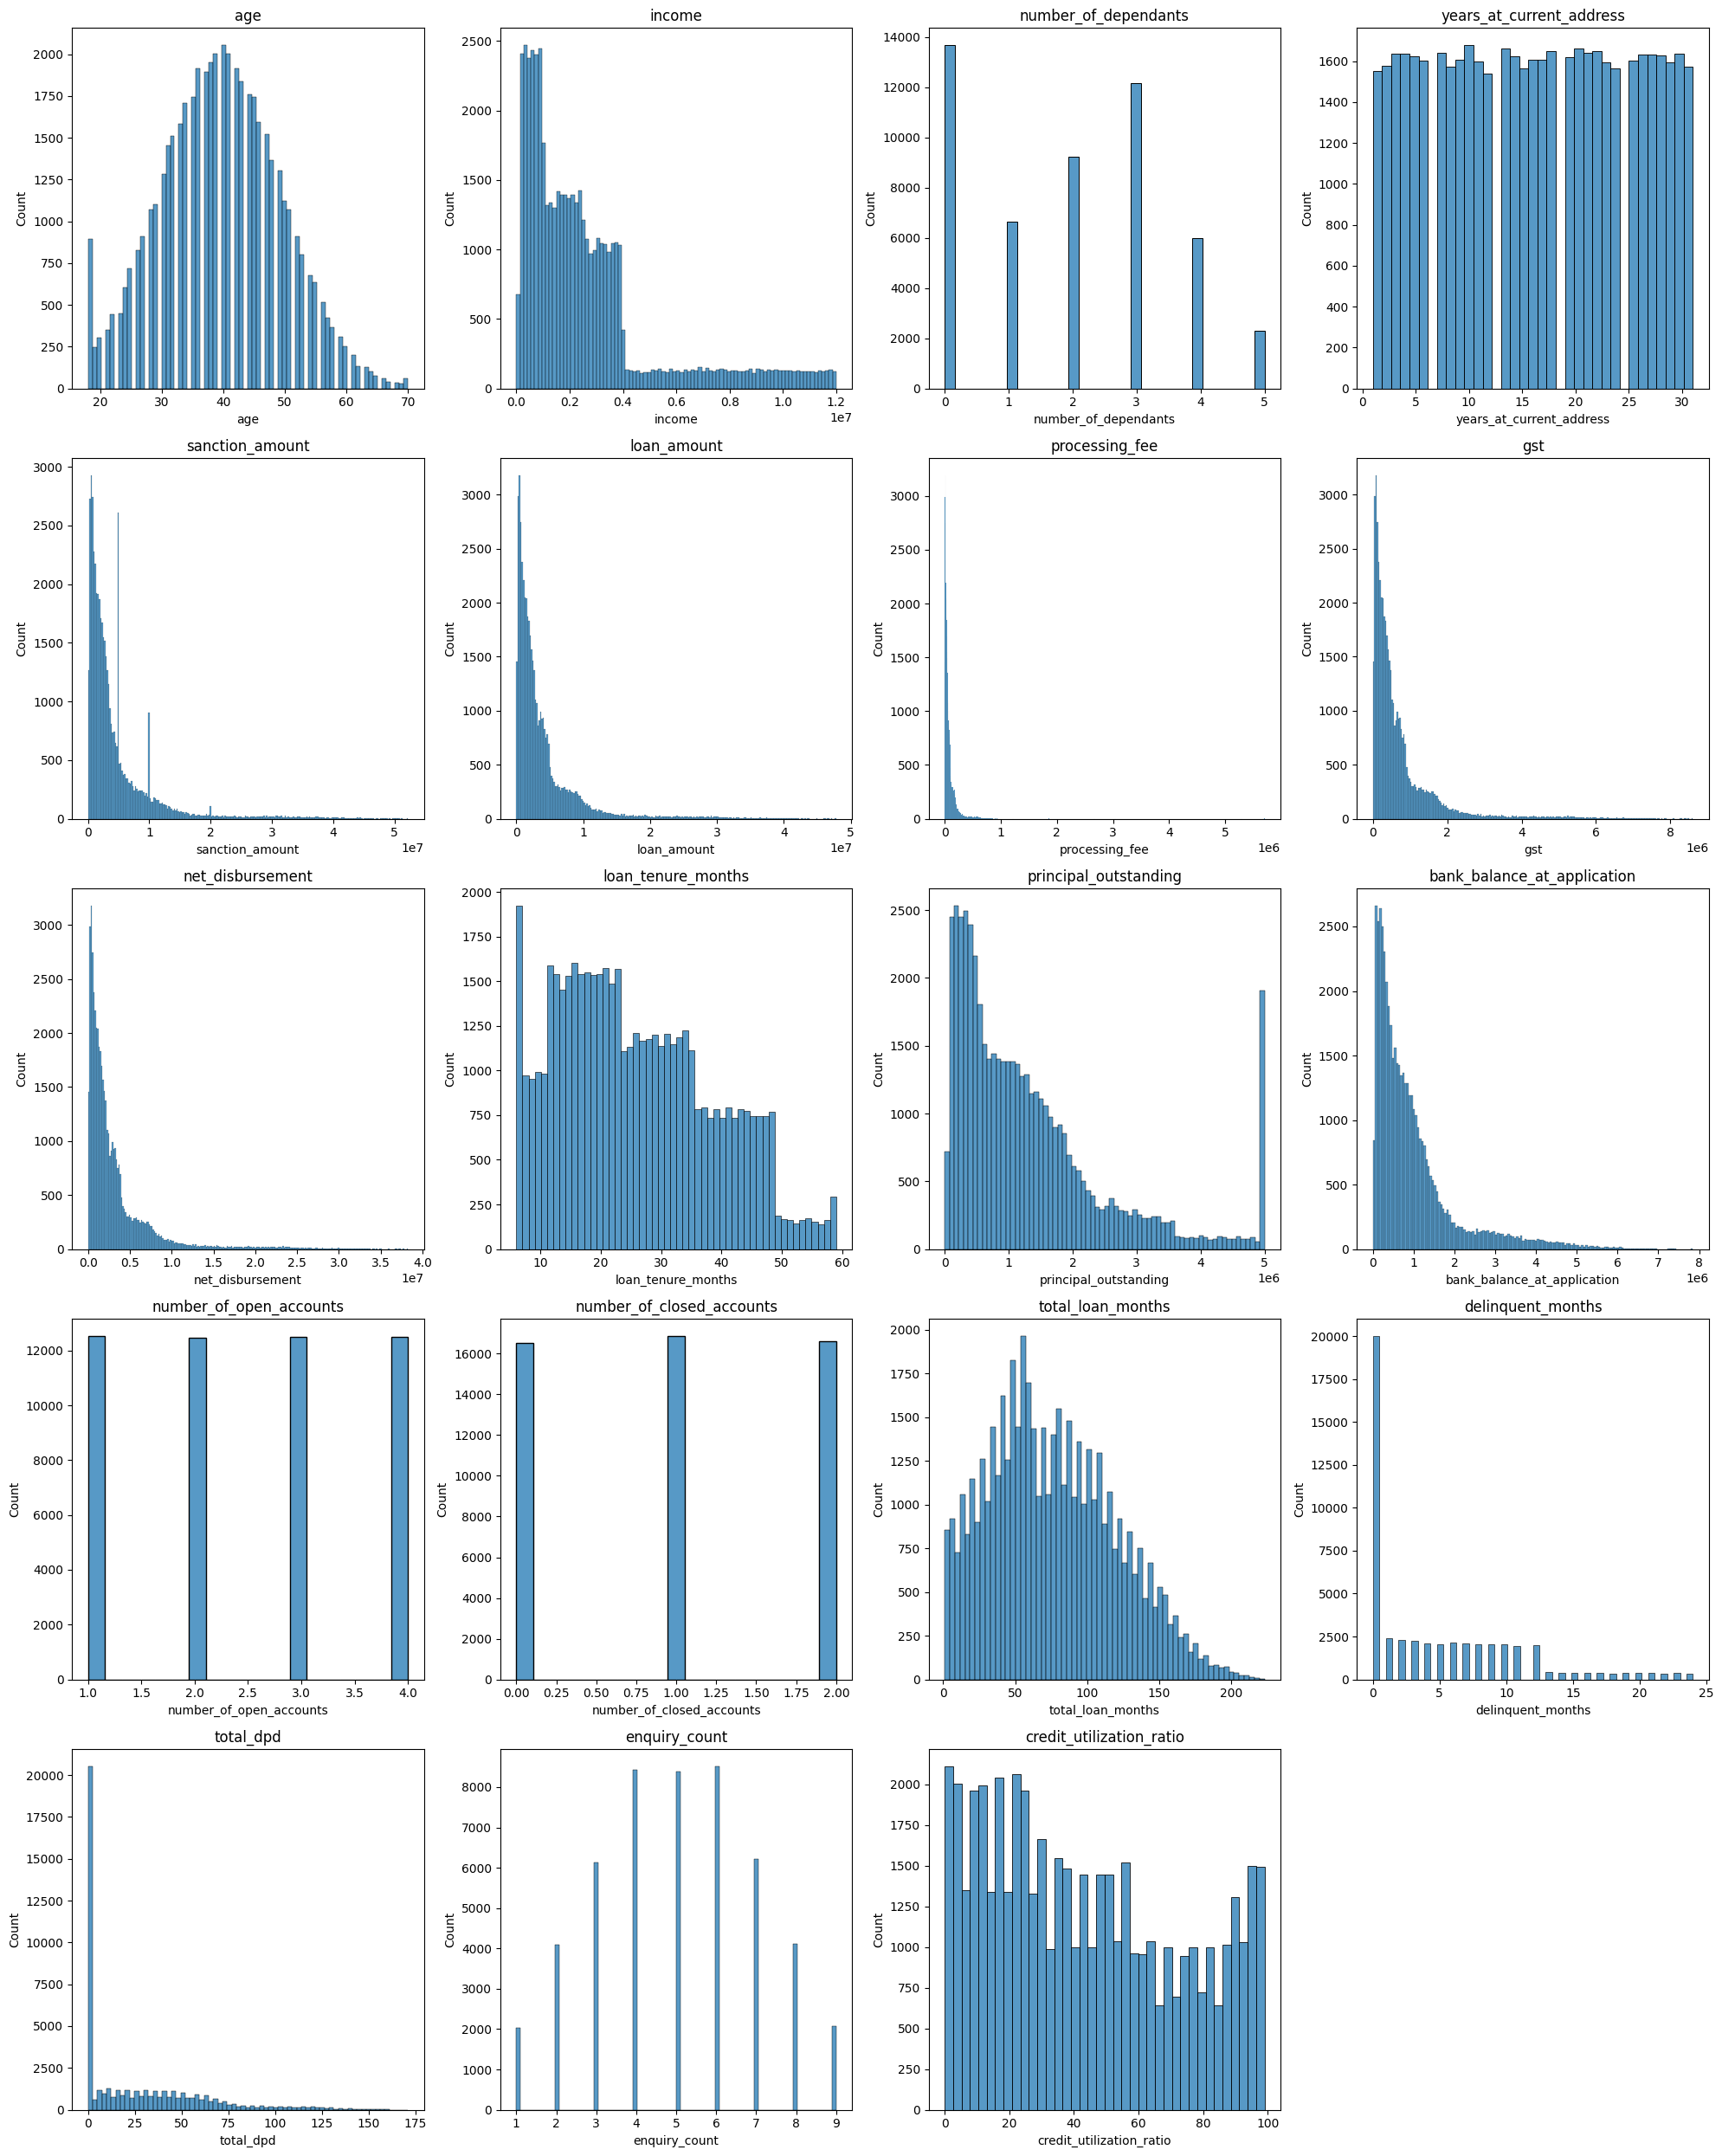

In [312]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Outlier Removal: Processing Fee

In [313]:
df.processing_fee.describe()

count     50000.00
mean      80494.71
std      117312.26
min           0.00
25%       19340.00
50%       44800.00
75%       92240.00
max     5698029.90
Name: processing_fee, dtype: float64

In [314]:
df[(df.processing_fee/df.loan_amount)>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
9898,3626000,5293543.52
12294,4639000,5698029.90
23981,2234000,2669791.02
28174,966000,1214492.67
29305,2616000,3036378.01
33705,3812000,5678020.86
47089,1738000,1858964.77


In [315]:
df_1 = df[df.processing_fee/df.loan_amount<0.03].copy()
df_1.shape

(49985, 33)

In [316]:
# Use other business rules for data validation
# Rule 1: GST should not be more than 20%
df_1[(df_1.gst/df_1.loan_amount)>0.2].shape

(0, 33)

In [317]:
# Rule 2: Net disbursement should not be higher than loan_amount
df_1[df_1.net_disbursement>df_1.loan_amount].shape

(0, 33)

No rows found that breaks rule 1 and rule 2

### Analyze Categorical Columns

In [318]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [319]:
for col in columns_categorical:
    print(col, "-->", df_1[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Delhi' 'Chennai' 'Kolkata' 'Bangalore' 'Pune' 'Jaipur' 'Lucknow'
 'Mumbai' 'Ahmedabad' 'Hyderabad']
state --> ['Delhi' 'Tamil Nadu' 'West Bengal' 'Karnataka' 'Maharashtra' 'Rajasthan'
 'Uttar Pradesh' 'Gujarat' 'Telangana']
zipcode --> [110001 600001 700001 560001 411001 302001 226001 400001 380001 500001]
loan_purpose --> ['Auto' 'Home' 'Personal' 'Education' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


### Fix Errors in Loan Purpose Column

In [320]:
df_1['loan_purpose'] = df_1['loan_purpose'].replace('Personaal', 'Personal')
df_1['loan_purpose'].unique()

array(['Auto', 'Home', 'Personal', 'Education'], dtype=object)

## Exploratory Data Analysis 

In [321]:
columns_continuous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

### Age Column

In [322]:
df_1.groupby("default")['age'].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,45688.00,39.76,9.87,18.00,33.00,40.00,46.00,70.00
1,4297.00,37.29,9.33,18.00,31.00,37.00,44.00,70.00


**Insights**

1. Average age in the default group is little less (37.29) than the average (39.76) of the group that did not default
1. Variability (standard deviation) is mostly similar in both the groups
1. Both the groups have similar min and max ages

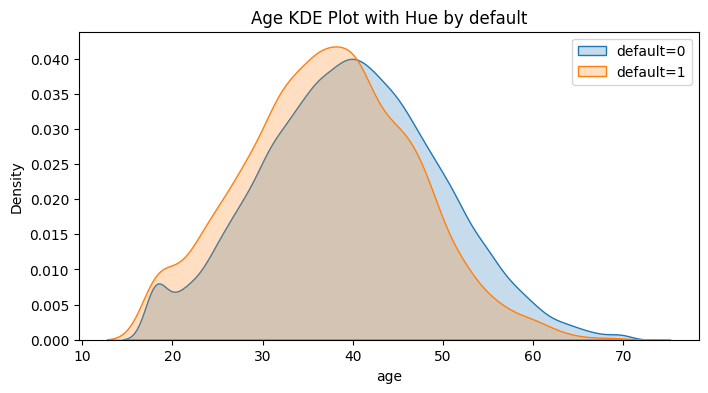

In [323]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_1['age'][df_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_1['age'][df_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Age KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insights**

1. Orange (defaulted) group is slightly shifted to left indicating that younger folks are more likely to default on their loans

### KDE for all the Columns

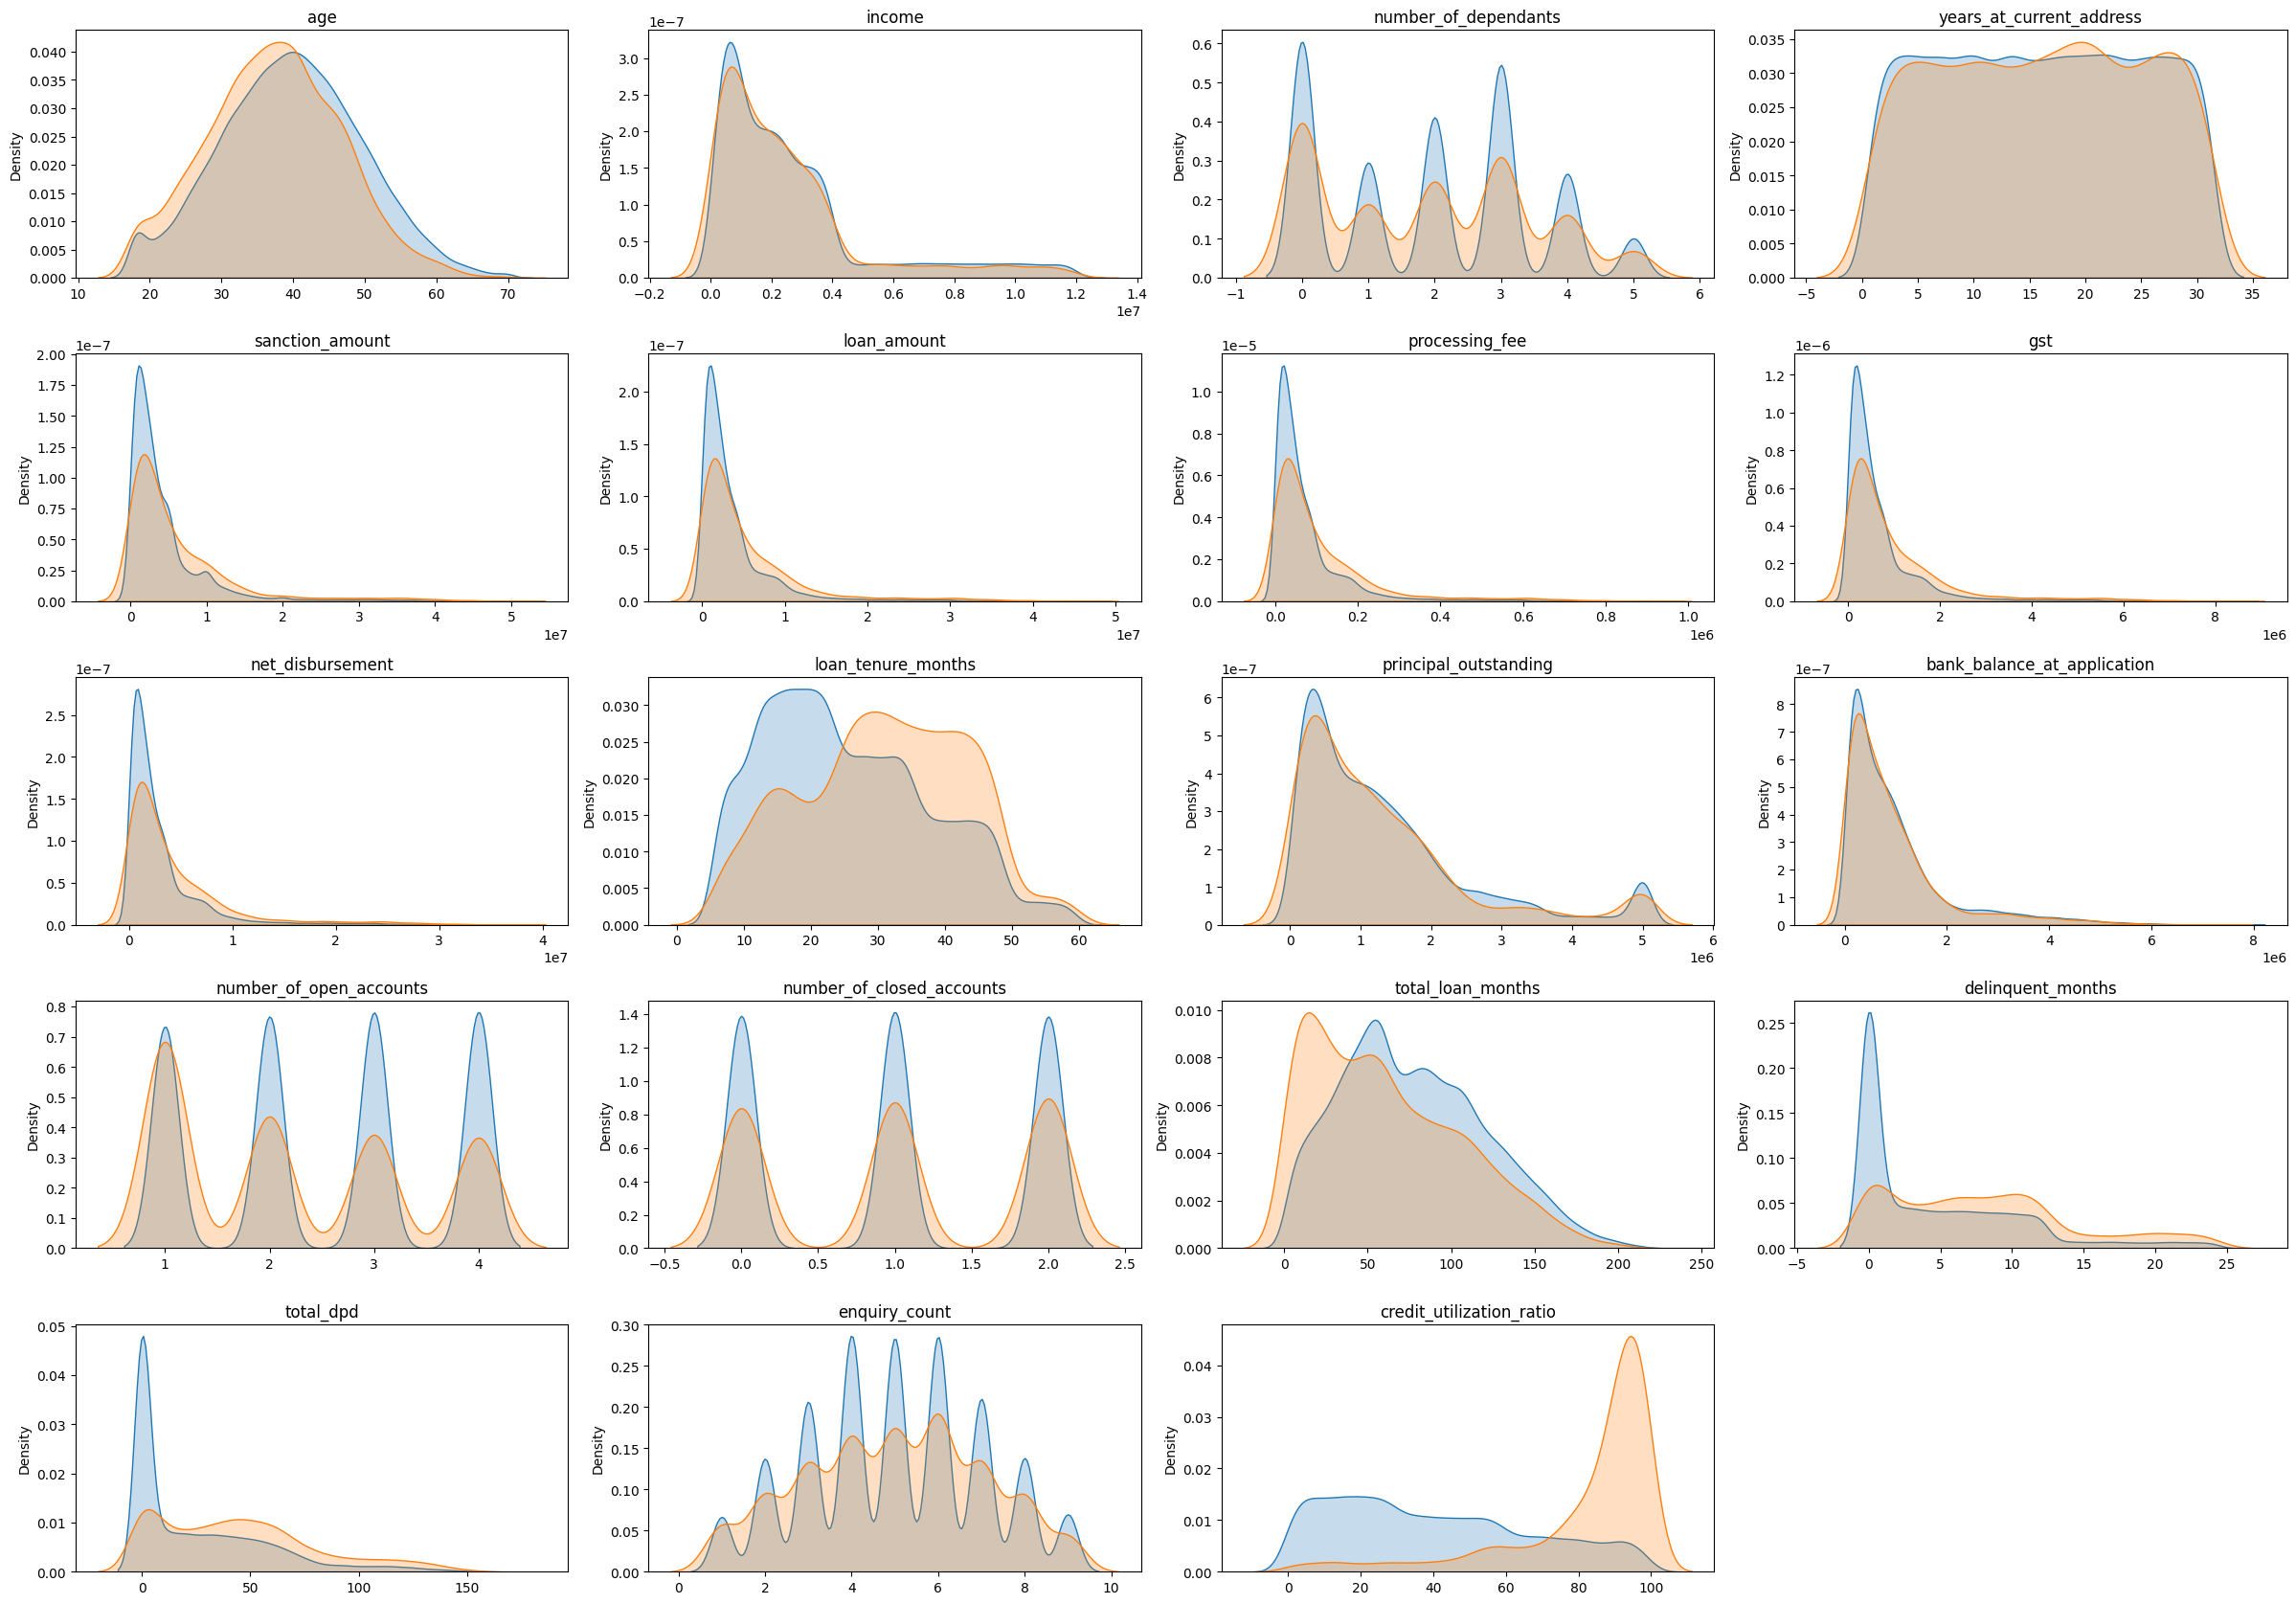

In [324]:
plt.figure(figsize=(24, 20))  # Width, height in inches

for i, col in enumerate(columns_continuous):
    plt.subplot(6, 4, i+1)  # 1 row, 4 columns, ith subplot
    sns.kdeplot(df_1[col][df_1['default']==0], fill=True, label='default=0')
    sns.kdeplot(df_1[col][df_1['default']==1], fill=True, label='default=1')
    plt.title(col)        
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

**Insights**

1. In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a default. Hence these 4 looks like strong predictors
1. In remaining columns the distributions do not give any obvious insights
1. Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable. We will explore more later

## Feature Engineering & Feature Selection

#### Generate Loan to Income (LTI) Ratio

In [325]:
df_1[["loan_amount", "income"]].head(3)

,loan_amount,income
0,2467000,2586000
1,3883000,1206000
2,2170000,2878000


In [326]:
df_1['loan_to_income'] = round(df_1['loan_amount'] / df_1['income'],2)
df_1['loan_to_income'].describe()

count   49985.00
mean        1.56
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.45
max         4.59
Name: loan_to_income, dtype: float64

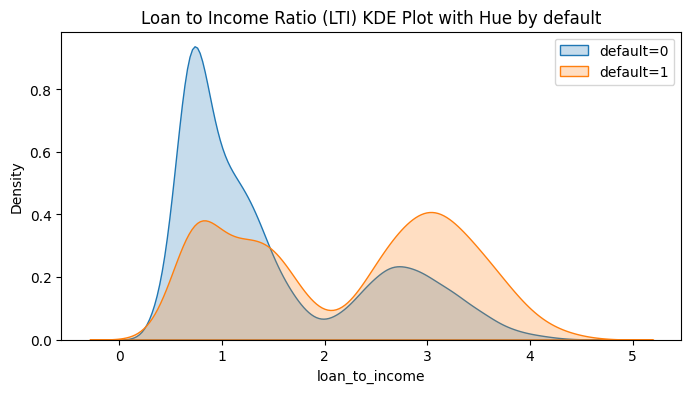

In [327]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_1['loan_to_income'][df_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_1['loan_to_income'][df_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Loan to Income Ratio (LTI) KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insights**
1. Blue graph has majority of its values on lower side of LTI
2. Orange graph has many values when LTI is higher indicating that higher LTI means high risk loan

#### Generate Delinquency Ratio

In [328]:
df_1['delinquency_ratio'] = (df_1['delinquent_months']*100 / df_1['total_loan_months']).round(1)

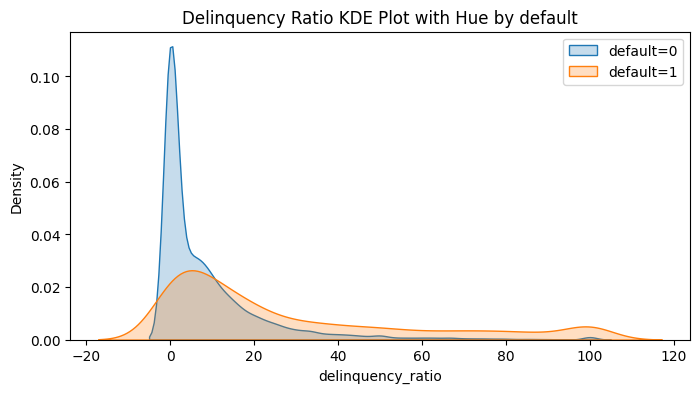

In [329]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_1['delinquency_ratio'][df_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_1['delinquency_ratio'][df_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insights**
1. Blue graph has majority of its values on lower side of LTI
2. Orange graph has many values when delinquency ratio is higher indicating some correlation on default

#### Generate Avg DPD Per Delinquency

In [330]:
df_1['avg_dpd_per_delinquency'] = np.where(
    df_1['delinquent_months'] != 0,
    (df_1['total_dpd'] / df_1['delinquent_months']).round(1),
    0
)

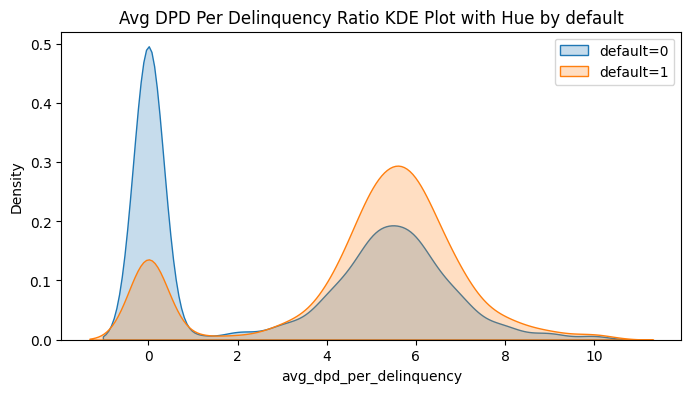

In [331]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_1['avg_dpd_per_delinquency'][df_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_1['avg_dpd_per_delinquency'][df_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Avg DPD Per Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insights**

1. Graph clearly shows more occurances of default cases when avg_dpd_per_delinquency is high. This means this column is a strong predictor

### Remove columns that are just unique ids and don't have influence on target

In [332]:
df_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'default',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [333]:
df_2 = df_1.drop(['cust_id', 'loan_id'],axis="columns")

### Remove columns that business contact person asked us to remove

In [334]:
df_3 = df_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'default', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [335]:
df_3.select_dtypes(['int64', 'float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'default', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

### VIF to measure multicolinearity

In [336]:
X = df_3.drop('default', axis='columns')
y = df_3['default']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = X.select_dtypes(['int64', 'float64']).columns

scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,49985.00,49985.00,49985.00,49985.00,49985.00,49985.00,49985.00,49985.00,49985.00,49985.00,49985.00,49985.00,49985.00,49985.00,49985.00,49985.00,49985.00,49985.00
mean,0.41,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.49,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [337]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [338]:
X.head(2)

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
0,0.50,M,Married,Self-Employed,0.60,Owned,0.87,Delhi,Delhi,0.00,...,0.51,0.32,0.11,0.00,0.50,0.25,0.07,0.15,0.00,0.00
1,0.38,M,Married,Salaried,0.60,Owned,0.10,Chennai,Tamil Nadu,0.83,...,0.45,0.14,0.06,0.67,0.50,0.50,0.04,0.68,0.12,0.50


In [339]:
calculate_vif(X[cols_to_scale])

d:\Workspace\.conda\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.72
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.80
4,sanction_amount,101.42
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.13
9,principal_outstanding,16.25


In [340]:
features_to_drop_vif = ['sanction_amount','processing_fee', 'gst', 'net_disbursement']

X_1 = X.drop(features_to_drop_vif, axis='columns')
numeric_columns = X_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [341]:
calculate_vif(X_1[numeric_columns])

,Column,VIF
0,age,5.56
1,number_of_dependants,2.72
2,years_at_current_address,3.41
3,zipcode,3.78
4,loan_tenure_months,6.01
5,principal_outstanding,11.04
6,bank_balance_at_application,9.28
7,number_of_open_accounts,4.35
8,number_of_closed_accounts,2.37
9,enquiry_count,6.37


In [342]:
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

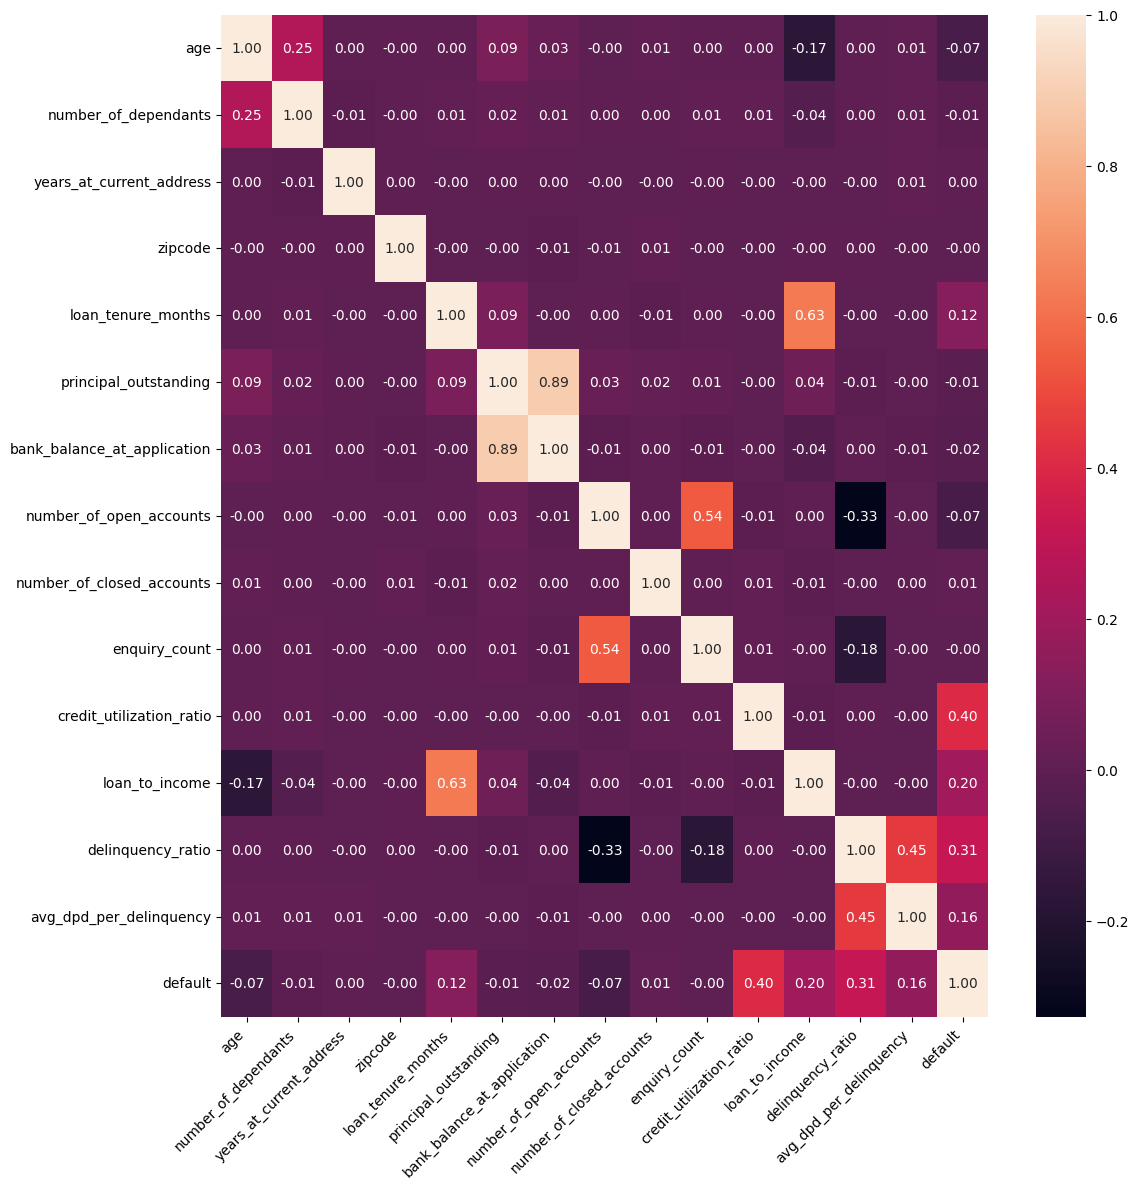

In [343]:
plt.figure(figsize=(12,12))
cm = df_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Feature Selection: Categorical Features

In [344]:
X_1.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
0,0.50,M,Married,Self-Employed,0.60,Owned,0.87,Delhi,Delhi,0.00,...,0.51,0.32,0.11,0.00,0.50,0.25,0.07,0.15,0.00,0.00
1,0.38,M,Married,Salaried,0.60,Owned,0.10,Chennai,Tamil Nadu,0.83,...,0.45,0.14,0.06,0.67,0.50,0.50,0.04,0.68,0.12,0.50
2,0.54,F,Married,Self-Employed,0.60,Owned,0.77,Kolkata,West Bengal,1.00,...,0.28,0.31,0.19,0.33,0.50,0.62,0.59,0.10,0.29,0.61
3,0.71,F,Single,Self-Employed,0.20,Owned,0.47,Bangalore,Karnataka,0.76,...,0.00,0.25,0.13,0.67,0.00,0.50,0.26,0.04,0.13,0.58
4,0.37,M,Married,Salaried,0.60,Owned,0.90,Pune,Maharashtra,0.51,...,0.42,0.35,0.13,1.00,1.00,0.50,0.10,0.24,0.00,0.00


### Calculate WOE and IV

In [345]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']
    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    
    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_1, y],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,9933,426,9507,0.10,0.21,-0.74,0.08
Education,7554,744,6810,0.17,0.15,0.15,0.00
Home,15025,2333,12692,0.54,0.28,0.67,0.18
Personal,17473,794,16679,0.18,0.37,-0.68,0.12


In [346]:
total_iv

np.float64(0.3848104269024987)

In [347]:
X_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49985 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          49985 non-null  float64
 1   gender                       49985 non-null  object 
 2   marital_status               49985 non-null  object 
 3   employment_status            49985 non-null  object 
 4   number_of_dependants         49985 non-null  float64
 5   residence_type               49985 non-null  object 
 6   years_at_current_address     49985 non-null  float64
 7   city                         49985 non-null  object 
 8   state                        49985 non-null  object 
 9   zipcode                      49985 non-null  float64
 10  loan_purpose                 49985 non-null  object 
 11  loan_type                    49985 non-null  object 
 12  loan_tenure_months           49985 non-null  float64
 13  principal_outstanding

In [348]:
iv_values = {}

for feature in X_1.columns:
    if X_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_1, y],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(X_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y],axis=1), feature, 'default' )
    iv_values[feature] = iv
        
iv_values

{'age': np.float64(0.07459381291597487),
 'gender': np.float64(0.0003939200223230576),
 'marital_status': np.float64(0.001925975658117442),
 'employment_status': np.float64(0.002947939001510809),
 'number_of_dependants': np.float64(0.003496877230481364),
 'residence_type': np.float64(0.24729142378232133),
 'years_at_current_address': np.float64(0.001619829649071367),
 'city': np.float64(0.0014000241730758277),
 'state': np.float64(0.0012663165277002064),
 'zipcode': np.float64(0.0013580042818183823),
 'loan_purpose': np.float64(0.3848104269024987),
 'loan_type': np.float64(0.16781384474824673),
 'loan_tenure_months': np.float64(0.2203789862946433),
 'principal_outstanding': np.float64(0.018188815536708185),
 'bank_balance_at_application': np.float64(0.005774242416399056),
 'number_of_open_accounts': np.float64(0.08319511085396353),
 'number_of_closed_accounts': np.float64(0.0008432568329858312),
 'enquiry_count': np.float64(0.0076624458396474604),
 'credit_utilization_ratio': np.float6

In [349]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
18,credit_utilization_ratio,2.414
20,delinquency_ratio,0.702
19,loan_to_income,0.479
21,avg_dpd_per_delinquency,0.406
10,loan_purpose,0.385
5,residence_type,0.247
12,loan_tenure_months,0.220
11,loan_type,0.168
15,number_of_open_accounts,0.083
0,age,0.075


In [350]:
# select features that has IV > 0.02
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

### Feature Encoding

In [351]:
X_train_reduced = X_1[selected_features_iv]

In [352]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True , dtype = int)
X_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
0,0.500,0.509,0.000,0.071,0.152,0.000,0.000,1,0,0,0,0,0
1,0.385,0.453,0.667,0.040,0.681,0.125,0.500,1,0,0,1,0,0
2,0.538,0.283,0.333,0.586,0.105,0.293,0.610,1,0,0,0,1,1


In [353]:
from sklearn.model_selection import train_test_split

# Assuming X contains features and y contains target labels
X_train, X_test, y_train, y_test = train_test_split(X_train_encoded, y, test_size=0.20, random_state=42)

In [354]:
y_train.value_counts()

default
0    36517
1     3471
Name: count, dtype: int64

Since we observe class imbalance, we will handle it using **SMOTETomek**. We apply it **after train-test split** to ensure that the testing dataset retains its **original class distribution**, allowing for a more realistic model evaluation.

In [355]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
y_train_smt.value_counts()

default
0    36447
1    36447
Name: count, dtype: int64

# Model Training

1. Logistic Regression

In [356]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      9171
           1       0.54      0.95      0.68       826

    accuracy                           0.93      9997
   macro avg       0.77      0.94      0.82      9997
weighted avg       0.96      0.93      0.94      9997



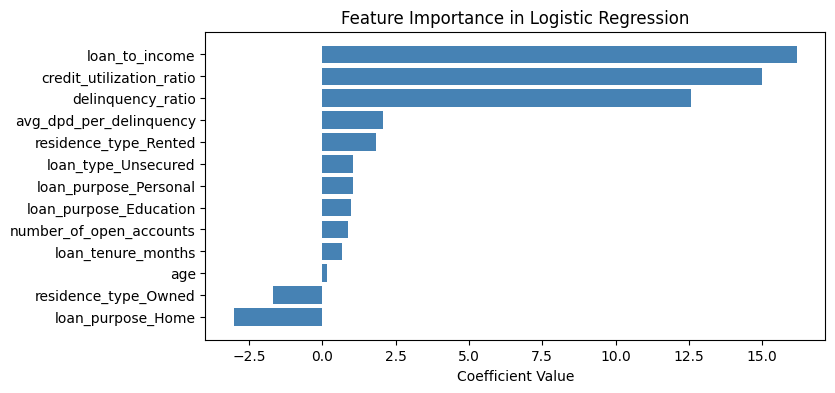

In [357]:
feature_importance = model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

2. Random Forest Classifier

In [358]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      9171
           1       0.69      0.86      0.76       826

    accuracy                           0.96      9997
   macro avg       0.84      0.91      0.87      9997
weighted avg       0.96      0.96      0.96      9997



3. XGB Classifier

In [359]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      9171
           1       0.71      0.84      0.77       826

    accuracy                           0.96      9997
   macro avg       0.85      0.91      0.88      9997
weighted avg       0.96      0.96      0.96      9997



Logistic regression is well-suited for **credit risk modeling** due to its **high recall**, ensuring that most potential defaulters are identified. Since final approvals involve **human verification**, a model with high recall minimizes the risk of missing high-risk applicants. Additionally, logistic regression offers **high explainability**, making it easier to interpret and justify lending decisions.

In [360]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-03-15 19:50:38,713] A new study created in memory with name: no-name-8bb6918c-518d-41e2-820c-d16b0f9f85df
[I 2025-03-15 19:50:41,974] Trial 0 finished with value: 0.944563094929984 and parameters: {'C': 22.022910140124026, 'solver': 'lbfgs', 'tol': 1.3333234274609744e-05, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.944563094929984.
[I 2025-03-15 19:50:44,424] Trial 1 finished with value: 0.9175286549047152 and parameters: {'C': 0.0024357391443903197, 'solver': 'newton-cg', 'tol': 3.876273486714364e-06, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.944563094929984.
[I 2025-03-15 19:50:46,785] Trial 2 finished with value: 0.9303053194604732 and parameters: {'C': 0.011052592304105675, 'solver': 'newton-cg', 'tol': 3.442814722661138e-05, 'class_weight': None}. Best is trial 0 with value: 0.944563094929984.
[I 2025-03-15 19:50:46,960] Trial 3 finished with value: 0.9250925575340454 and parameters: {'C': 2.041023540076779, 'solver': 'lbfgs', 'tol': 0.00549

In [361]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9446318273046422
  Params: 
    C: 453.5020001490323
    solver: liblinear
    tol: 4.4520772996116085e-05
    class_weight: balanced
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      9171
           1       0.54      0.95      0.69       826

    accuracy                           0.93      9997
   macro avg       0.77      0.94      0.82      9997
weighted avg       0.96      0.93      0.94      9997



## Model Evaluation : ROC/AUC

In [362]:
import copy

model = copy.deepcopy(best_model_logistic)

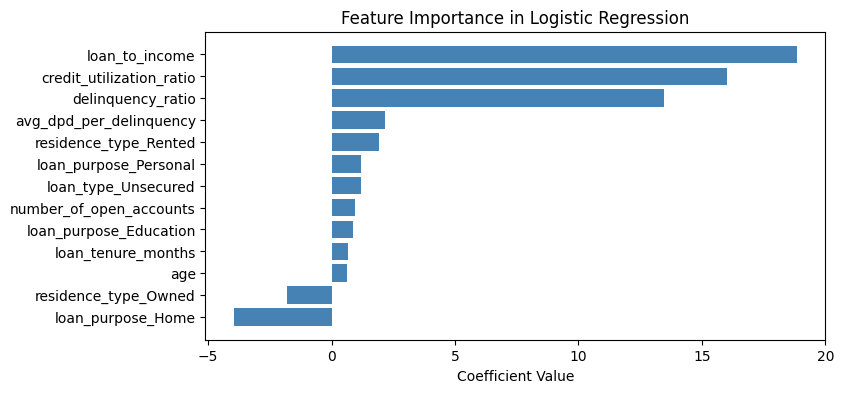

In [363]:
feature_importance = model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_smt.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [364]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      9171
           1       0.54      0.95      0.69       826

    accuracy                           0.93      9997
   macro avg       0.77      0.94      0.82      9997
weighted avg       0.96      0.93      0.94      9997



In [365]:
from sklearn.metrics import roc_curve

probabilities = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:5], tpr[:5], thresholds[:5]

(array([0.        , 0.        , 0.        , 0.00010904, 0.00010904]),
 array([0.        , 0.00121065, 0.17554479, 0.17554479, 0.20823245]),
 array([       inf, 0.99999995, 0.99926822, 0.99926482, 0.99882919]))

In [366]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

np.float64(0.9820708132778792)

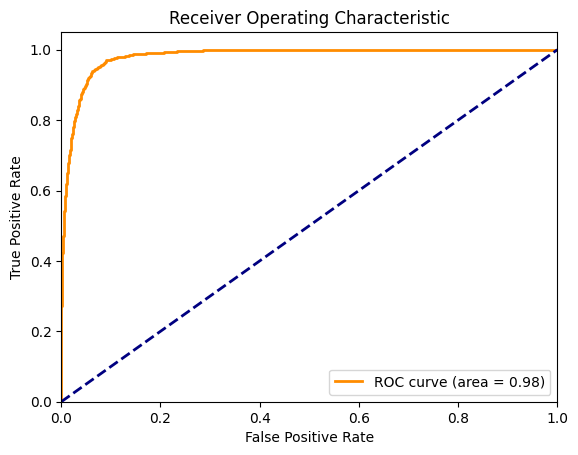

In [367]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Model Evaluation : Rankordering, KS statistic, Gini coeff

In [368]:
probabilities = model.predict_proba(X_test)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
18112,0,0.000
48179,0,0.000
30595,0,0.002


In [369]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
18112,0,0.000,2
48179,0,0.000,1
30595,0,0.002,5


In [370]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

count   1000.000
mean       0.480
std        0.171
min        0.211
25%        0.324
50%        0.467
75%        0.621
max        0.794
Name: Default Probability, dtype: float64

In [371]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
df_decile

C:\Users\user\AppData\Local\Temp\ipykernel_20520\4037021561.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.000,0.000,0.000,1000.000
1,1,0.000,0.000,0.000,1000.000
2,2,0.000,0.000,0.000,999.000
3,3,0.000,0.000,0.000,1000.000
4,4,0.000,0.001,0.000,1000.000
5,5,0.001,0.004,0.000,999.000
6,6,0.004,0.031,4.000,996.000
7,7,0.031,0.211,10.000,989.000
8,8,0.211,0.794,124.000,876.000
9,9,0.794,1.000,688.000,312.000


In [372]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.000,0.000,0.000,1000.000,0.000,100.000
1,1,0.000,0.000,0.000,1000.000,0.000,100.000
2,2,0.000,0.000,0.000,999.000,0.000,100.000
3,3,0.000,0.000,0.000,1000.000,0.000,100.000
4,4,0.000,0.001,0.000,1000.000,0.000,100.000
5,5,0.001,0.004,0.000,999.000,0.000,100.000
6,6,0.004,0.031,4.000,996.000,0.400,99.600
7,7,0.031,0.211,10.000,989.000,1.001,98.999
8,8,0.211,0.794,124.000,876.000,12.400,87.600
9,9,0.794,1.000,688.000,312.000,68.800,31.200


In [373]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,0.794,1.000,688.000,312.000,68.800,31.200
1,8,0.211,0.794,124.000,876.000,12.400,87.600
2,7,0.031,0.211,10.000,989.000,1.001,98.999
3,6,0.004,0.031,4.000,996.000,0.400,99.600
4,5,0.001,0.004,0.000,999.000,0.000,100.000
5,4,0.000,0.001,0.000,1000.000,0.000,100.000
6,3,0.000,0.000,0.000,1000.000,0.000,100.000
7,2,0.000,0.000,0.000,999.000,0.000,100.000
8,1,0.000,0.000,0.000,1000.000,0.000,100.000
9,0,0.000,0.000,0.000,1000.000,0.000,100.000


In [374]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.794,1.000,688.000,312.000,68.800,31.200,688.000,312.000
1,8,0.211,0.794,124.000,876.000,12.400,87.600,812.000,1188.000
2,7,0.031,0.211,10.000,989.000,1.001,98.999,822.000,2177.000
3,6,0.004,0.031,4.000,996.000,0.400,99.600,826.000,3173.000
4,5,0.001,0.004,0.000,999.000,0.000,100.000,826.000,4172.000
5,4,0.000,0.001,0.000,1000.000,0.000,100.000,826.000,5172.000
6,3,0.000,0.000,0.000,1000.000,0.000,100.000,826.000,6172.000
7,2,0.000,0.000,0.000,999.000,0.000,100.000,826.000,7171.000
8,1,0.000,0.000,0.000,1000.000,0.000,100.000,826.000,8171.000
9,0,0.000,0.000,0.000,1000.000,0.000,100.000,826.000,9171.000


In [375]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.794,1.000,688.000,312.000,68.800,31.200,688.000,312.000,83.293,3.402
1,8,0.211,0.794,124.000,876.000,12.400,87.600,812.000,1188.000,98.305,12.954
2,7,0.031,0.211,10.000,989.000,1.001,98.999,822.000,2177.000,99.516,23.738
3,6,0.004,0.031,4.000,996.000,0.400,99.600,826.000,3173.000,100.000,34.598
4,5,0.001,0.004,0.000,999.000,0.000,100.000,826.000,4172.000,100.000,45.491
5,4,0.000,0.001,0.000,1000.000,0.000,100.000,826.000,5172.000,100.000,56.395
6,3,0.000,0.000,0.000,1000.000,0.000,100.000,826.000,6172.000,100.000,67.299
7,2,0.000,0.000,0.000,999.000,0.000,100.000,826.000,7171.000,100.000,78.192
8,1,0.000,0.000,0.000,1000.000,0.000,100.000,826.000,8171.000,100.000,89.096
9,0,0.000,0.000,0.000,1000.000,0.000,100.000,826.000,9171.000,100.000,100.000


In [376]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.794,1.000,688.000,312.000,68.800,31.200,688.000,312.000,83.293,3.402,79.891
1,8,0.211,0.794,124.000,876.000,12.400,87.600,812.000,1188.000,98.305,12.954,85.351
2,7,0.031,0.211,10.000,989.000,1.001,98.999,822.000,2177.000,99.516,23.738,75.778
3,6,0.004,0.031,4.000,996.000,0.400,99.600,826.000,3173.000,100.000,34.598,65.402
4,5,0.001,0.004,0.000,999.000,0.000,100.000,826.000,4172.000,100.000,45.491,54.509
5,4,0.000,0.001,0.000,1000.000,0.000,100.000,826.000,5172.000,100.000,56.395,43.605
6,3,0.000,0.000,0.000,1000.000,0.000,100.000,826.000,6172.000,100.000,67.299,32.701
7,2,0.000,0.000,0.000,999.000,0.000,100.000,826.000,7171.000,100.000,78.192,21.808
8,1,0.000,0.000,0.000,1000.000,0.000,100.000,826.000,8171.000,100.000,89.096,10.904
9,0,0.000,0.000,0.000,1000.000,0.000,100.000,826.000,9171.000,100.000,100.000,0.000


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

**Insights from the Decile Table**

1. Top Deciles

* The first decile (Decile 9) has a high event rate of 83.17% and a non-event rate of 3.41%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.96%, with a cumulative event rate reaching 98.184%.

2. Middle Deciles:

* Deciles 7 and 6 show a significant drop in event rates

3. Lower Deciles:

* Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.

4. KS Statistic:

* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.98%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

* The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

**KS Value**

The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)

In [377]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9820708132778792
Gini Coefficient: 0.9641416265557583


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

### Save the Model

In [378]:
X_test.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
18112,0.481,0.283,1.000,0.152,0.072,0.118,0.590,0,0,0,0,1,1
48179,0.769,0.245,0.000,0.414,0.068,0.000,0.000,1,0,0,0,1,1


In [379]:
X_test.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [380]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [381]:
X_train_smt.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

Rescaling the data again to obtain the **scaler object**, ensuring that only the retained columns are transformed, excluding the dropped ones.

In [382]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['age', 'loan_tenure_months',
       'number_of_open_accounts', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured']

X_s = df_3.drop('default', axis='columns')
X_s = pd.get_dummies(X_s, drop_first=True , dtype = int)
scaler = MinMaxScaler()
scaler.fit_transform(X_s[cols_to_scale])

array([[0.5       , 0.50943396, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.38461538, 0.45283019, 0.66666667, ..., 1.        , 0.        ,
        0.        ],
       [0.53846154, 0.28301887, 0.33333333, ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.51923077, 0.58490566, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.46153846, 0.58490566, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.71153846, 0.60377358, 0.33333333, ..., 1.        , 0.        ,
        0.        ]], shape=(49985, 13))

In [383]:
# Suppose you have a list of features used for training
features = ['age', 'loan_tenure_months', 'number_of_open_accounts', 'credit_utilization_ratio',
            'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency',
            'residence_type_Owned', 'residence_type_Rented', 'loan_purpose_Education',
            'loan_purpose_Home', 'loan_purpose_Personal', 'loan_type_Unsecured']
            
model_data = {
    'model': model,
    'scaler': scaler,
    'features': features,
    'cols_to_scale': cols_to_scale
}
from joblib import dump
dump(model_data, 'artifacts/model_data.joblib')

['artifacts/model_data.joblib']

In [384]:
model.coef_

array([[ 0.61885192,  0.67793199,  0.96268277, 16.0067918 , 18.86590009,
        13.46193576,  2.14573541, -1.78836226,  1.9341904 ,  0.88383087,
        -3.96584428,  1.19465447,  1.19465447]])

In [385]:
model.intercept_

array([-21.39451576])